In [1]:
import pandas as pd 
import numpy as np

In [29]:
df=pd.read_csv(f"C:\Desktop\Swiggy\swiggy.csv")

In [30]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [31]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [32]:
df.dropna()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


C:\Users\prave\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prave\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Rating Distribution')

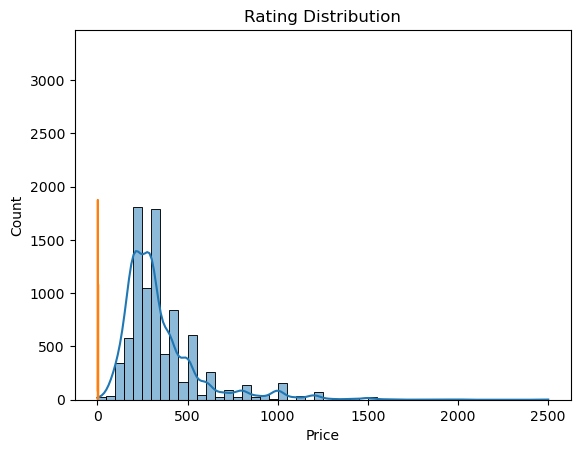

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')

sns.histplot(df['Avg ratings'], bins=20, kde=True)
plt.title('Rating Distribution')


<Axes: xlabel='City', ylabel='Price'>

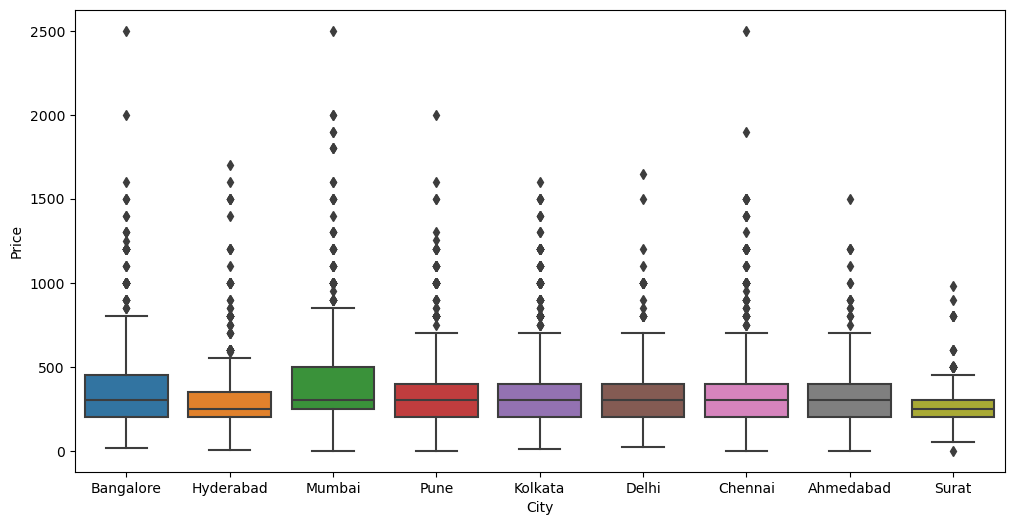

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=data)


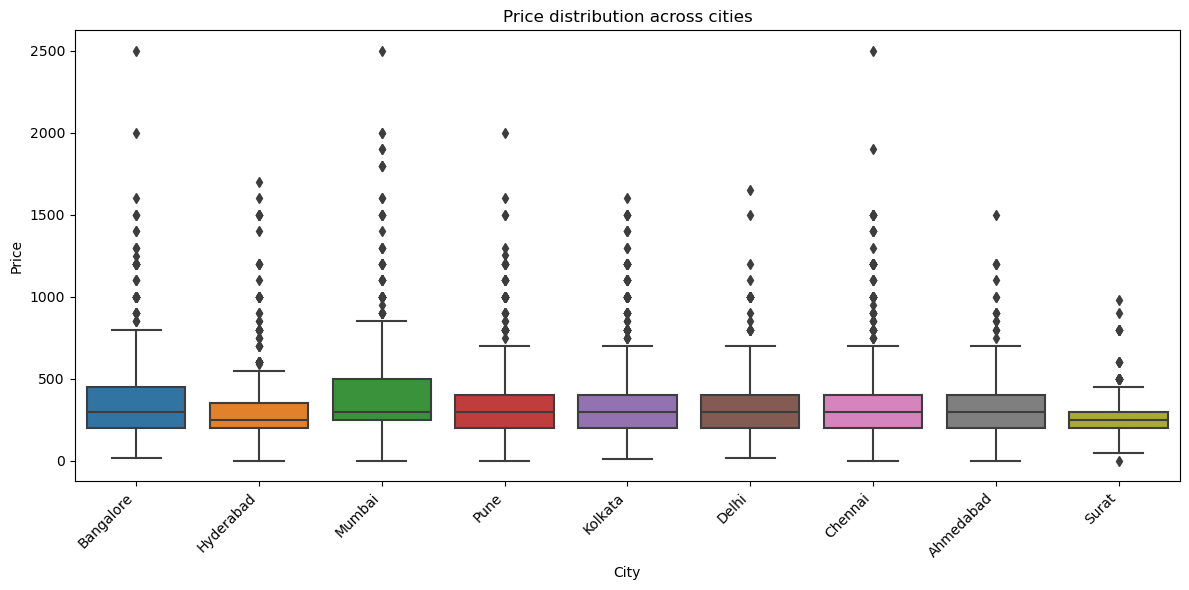

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=data)
plt.xticks(rotation=45, ha='right')
plt.title("Price distribution across cities")
plt.tight_layout()


In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Clean and split cuisine
df['Cuisine_list'] = df['Food type'].str.split(',').apply(lambda x: [i.strip() for i in x])

# Step 2: Binarize
mlb = MultiLabelBinarizer()
cuisine_df = pd.DataFrame(mlb.fit_transform(df['Cuisine_list']), columns=mlb.classes_)

# Step 3: Reset index to match if needed
cuisine_df.index = df.index

# Step 4: Combine with original DataFrame
df = pd.concat([df, cuisine_df], axis=1)


In [38]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,...,Thai,Thalis,Tibetan,Tibetan Chinese Asian Snacks Continental Desserts Beverages,Tribal,Turkish,Use code XPRESS121 to avail.,Vietnamese,Waffle,indian
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,...,0,0,0,0,0,0,0,0,0,0
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56,...,0,0,0,0,0,0,0,0,0,0
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50,...,0,0,0,0,0,0,0,0,0,0
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,...,0,0,0,0,0,0,0,0,0,0
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,...,0,1,0,0,0,0,0,0,0,0


In [39]:
from sklearn.preprocessing import StandardScaler

C:\Users\prave\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Rating distribution')

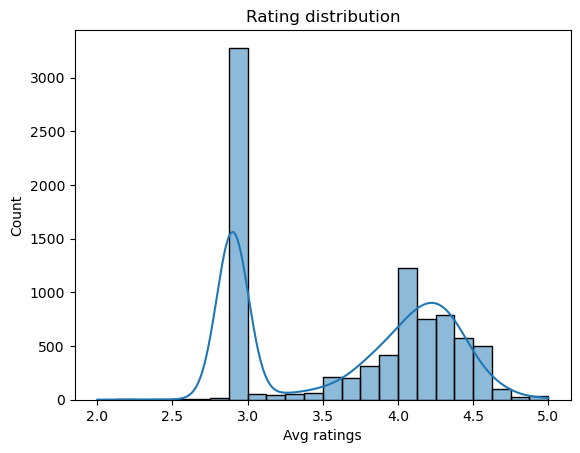

In [45]:
sns.histplot(df['Avg ratings'], kde=True)
plt.title('Rating distribution')

C:\Users\prave\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price Distribution')

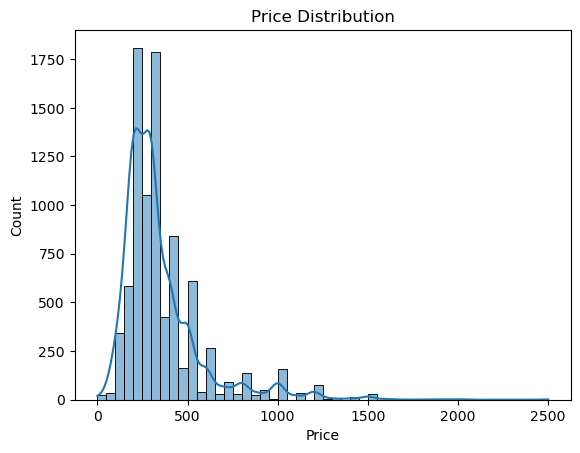

In [42]:
#normalising price and ratings

sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')

In [46]:
#prices are little skewed so log transformation
df['log_price']=np.log1p(df['Price'])
df['avg_ratings']=np.log1p(df['Avg ratings'])
df['log_total_ratings']=np.log1p(df['Total ratings'])
# ✅ 2. Select numerical features for scaling
num_features = ['log_price', 'avg_ratings', 'log_total_ratings']

# ✅ 3. Scale (standardize) features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[num_features])

# ✅ 4. Create scaled DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=[f"{col}_scaled" for col in num_features], index=df.index)

In [47]:
scaled_df.head()

,log_price_scaled,avg_ratings_scaled,log_total_ratings_scaled
0,0.018714,1.119114,0.210937
1,0.018714,0.715118,0.210937
2,1.378500,1.119114,0.210937
3,-0.301503,0.432360,1.904285
4,0.289606,0.575153,-0.511552


C:\Users\prave\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_price_scaled', ylabel='Count'>

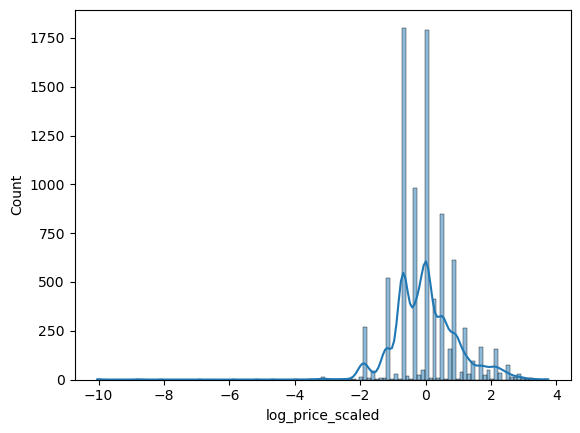

In [48]:
sns.histplot(scaled_df['log_price_scaled'], kde=True)

In [49]:
#concating to df
df=pd.concat([df,scaled_df], axis=1)

In [50]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,...,Use code XPRESS121 to avail.,Vietnamese,Waffle,indian,log_price,avg_ratings,log_total_ratings,log_price_scaled,avg_ratings_scaled,log_total_ratings_scaled
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,...,0,0,0,0,5.707110,1.686399,4.615121,0.018714,1.119114,0.210937
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56,...,0,0,0,0,5.707110,1.629241,4.615121,0.018714,0.715118,0.210937
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50,...,0,0,0,0,6.478510,1.686399,4.615121,1.378500,1.119114,0.210937
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,...,0,0,0,0,5.525453,1.589235,6.216606,-0.301503,0.432360,1.904285
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,...,0,0,0,0,5.860786,1.609438,3.931826,0.289606,0.575153,-0.511552


In [51]:
df.corr

<bound method DataFrame.corr of           ID                    Area       City                Restaurant  \
0        211             Koramangala  Bangalore               Tandoor Hut   
1        221             Koramangala  Bangalore             Tunday Kababi   
2        246               Jogupalya  Bangalore                   Kim Lee   
3        248             Indiranagar  Bangalore         New Punjabi Hotel   
4        249             Indiranagar  Bangalore                       Nh8   
...      ...                     ...        ...                       ...   
8675  464626  Panjarapole Cross Road  Ahmedabad                Malt Pizza   
8676  465835                  Rohini      Delhi  Jay Mata Ji Home Kitchen   
8677  465872                  Rohini      Delhi      Chinese Kitchen King   
8678  465990                  Rohini      Delhi    Shree Ram Paratha Wala   
8679  466488             Navrangpura  Ahmedabad              Sassy Street   

      Price  Avg ratings  Total ratings  \


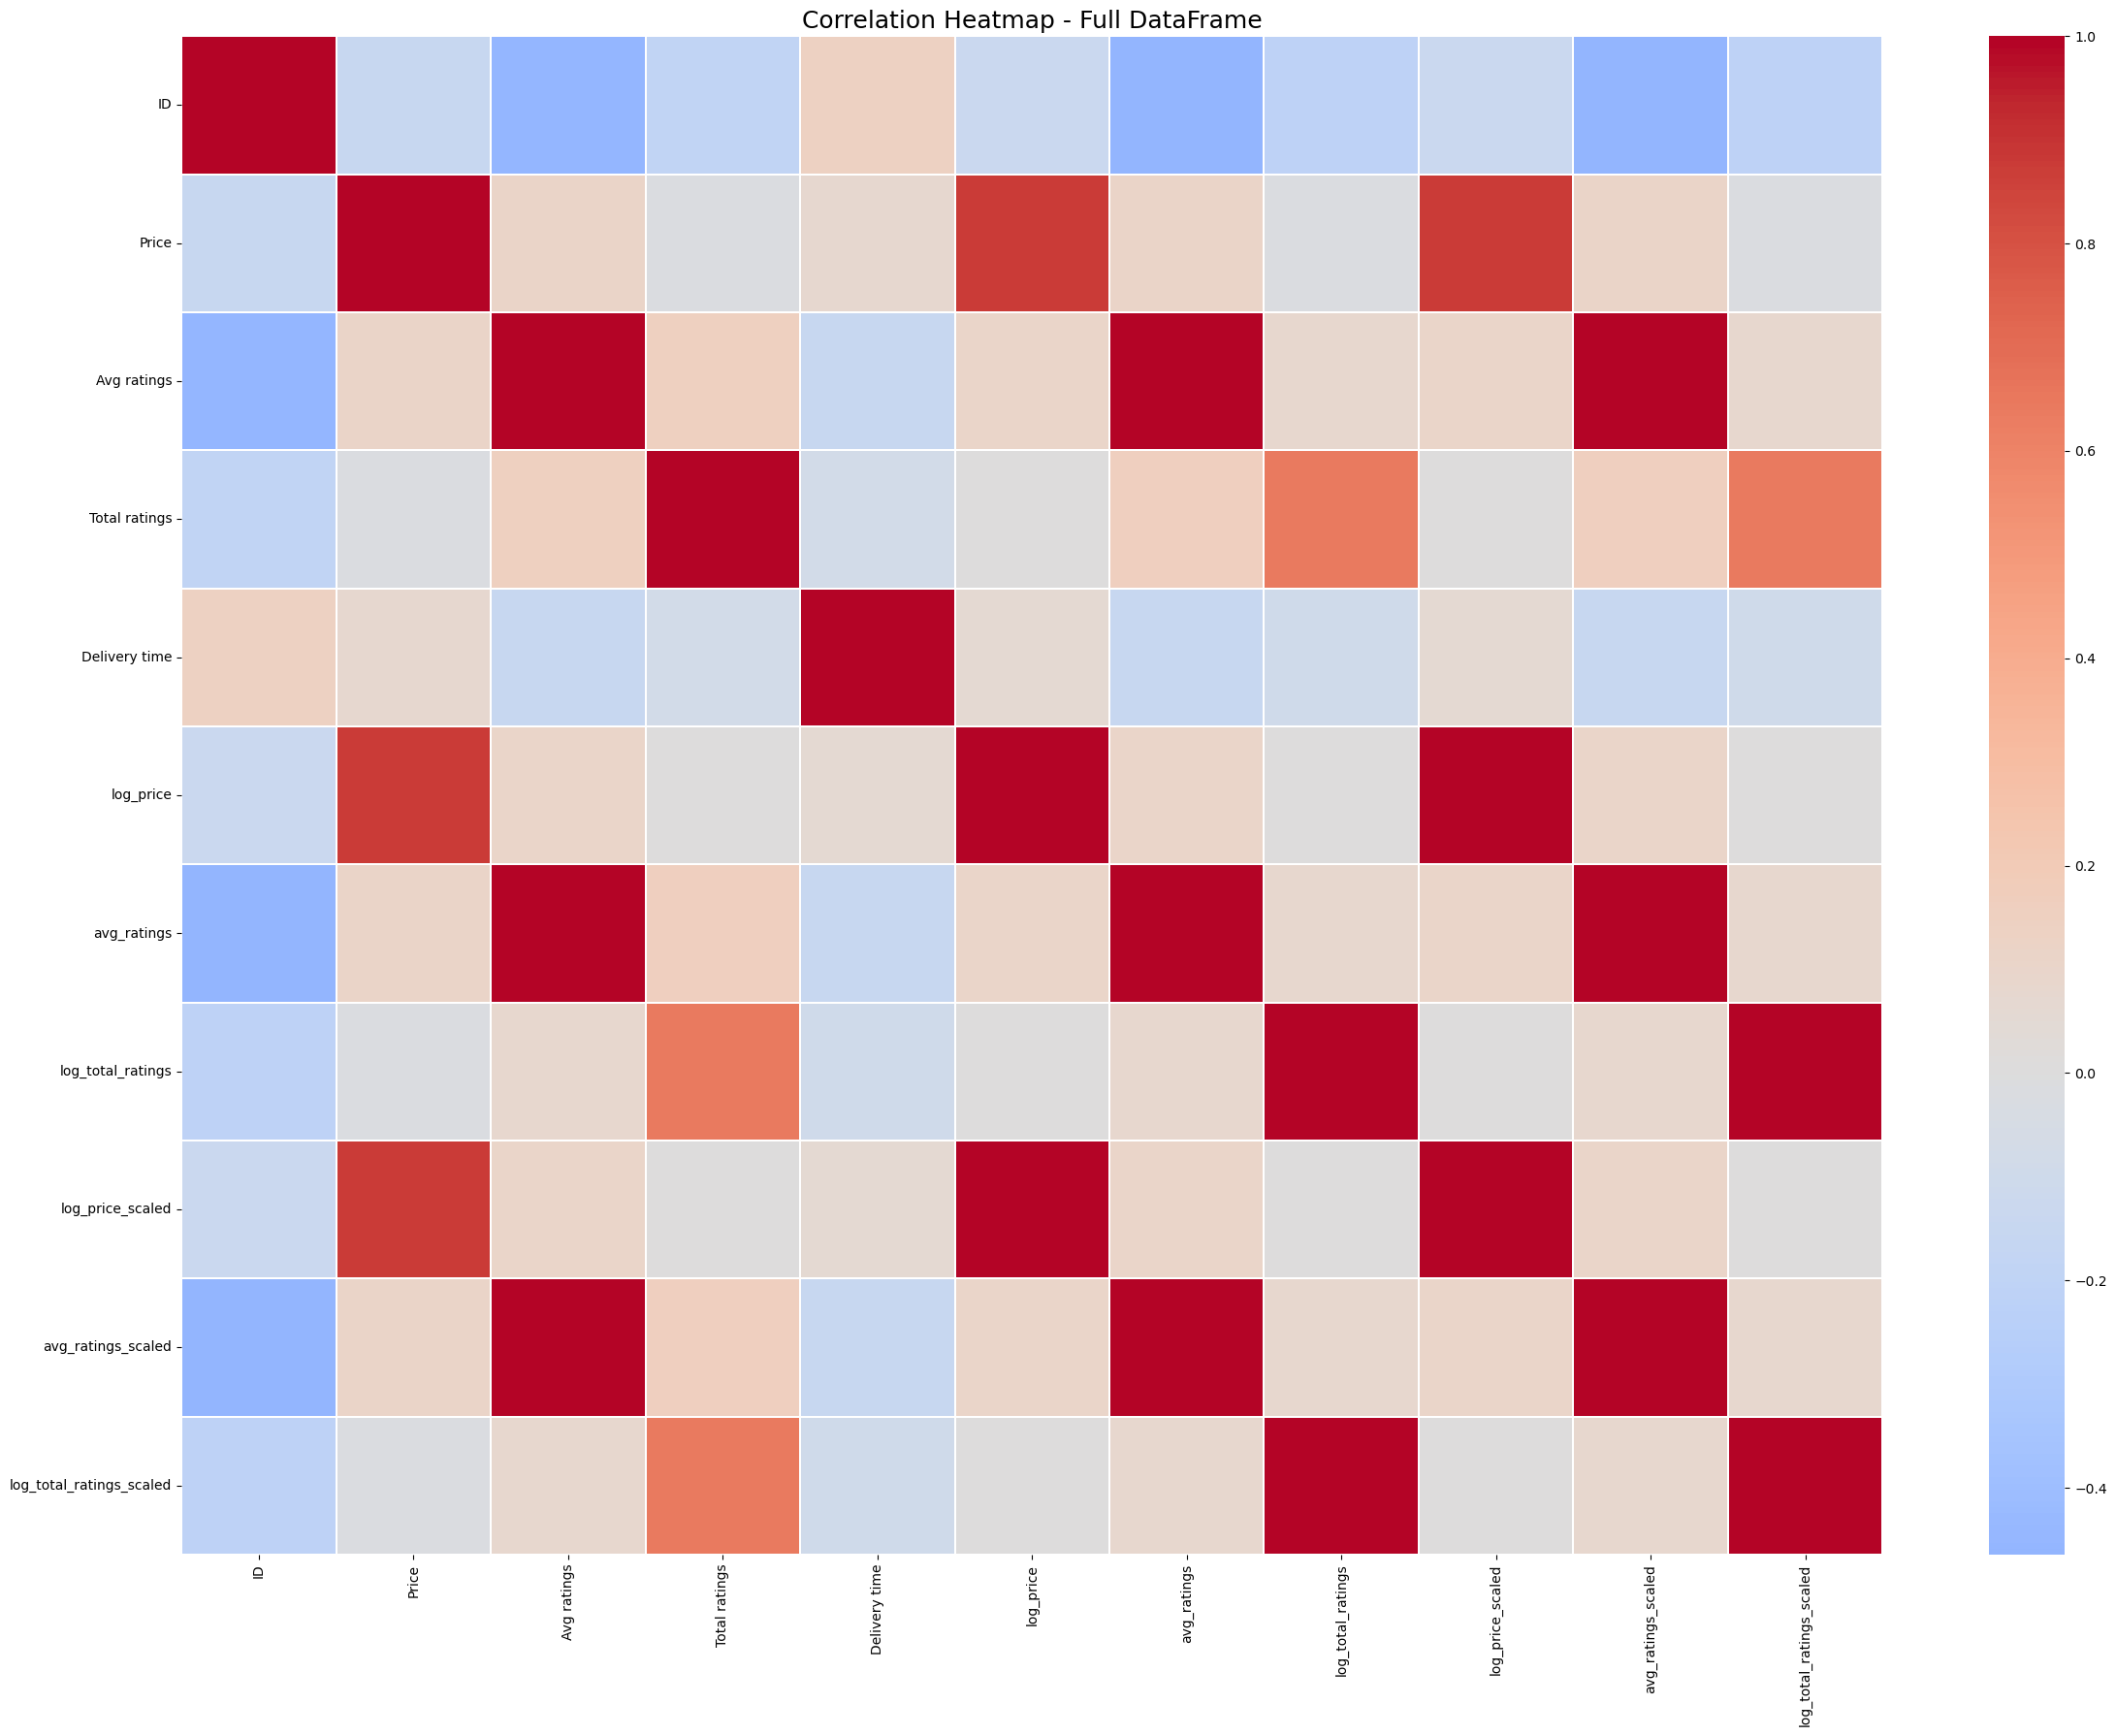

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop non-numeric columns (like strings, IDs, names, etc.)
# These will throw errors in correlation calculations
df_numeric = df.select_dtypes(include=['int64', 'float64', 'uint8'])

# Step 2: Compute correlation matrix
corr_matrix = df_numeric.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.3, annot=False)
plt.title("Correlation Heatmap - Full DataFrame", fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [55]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time',
       ...
       'Use code XPRESS121 to avail.', 'Vietnamese', 'Waffle', 'indian',
       'log_price', 'avg_ratings', 'log_total_ratings', 'log_price_scaled',
       'avg_ratings_scaled', 'log_total_ratings_scaled'],
      dtype='object', length=1218)

In [56]:
df.drop(columns=['log_price', 'log_total_ratings','avg_ratings'], inplace=True)


In [57]:
df.shape

(8680, 1215)

In [60]:
for col in base_features:
    if df[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column {col} contains lists.")


Column Cuisine_list contains lists.


In [75]:
#grouping area wise and then finding nearest neighbors based on price and cuisine they sell.
#NearestNeighbors totally based on distance
#PCA having too many features so PCA will eliminate non correlated features and im picking only 95% above correlated features

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Exclude columns that are not features
exclude_cols = ['ID', 'Area', 'City', 'Restaurant', 'Address', 'Delivery time', 'Food type','Cuisine_list']
base_features = [col for col in df.columns if col not in exclude_cols]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[base_features])

# PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to df using efficient concat
pc_df = pd.DataFrame(X_pca, columns=[f'pc_{i+1}' for i in range(X_pca.shape[1])])
df.reset_index(drop=True, inplace=True)
df_pca = pd.concat([df, pc_df], axis=1)

# Train Nearest Neighbors model per area -- including only pca features
area_models = {}
for area, group in df_pca.groupby('Area'):

    features = group[[col for col in df_pca.columns if col.startswith("pc_")]].values
    model = NearestNeighbors(n_neighbors=5, metric='euclidean')
    model.fit(features)
    area_models[area] = (model, group.reset_index(drop=True))


In [76]:
#searching area wise 
area = 'Bandra Area'
model, group = area_models[area]
features = group[[col for col in group.columns if col.startswith("pc_")]].values

# Get top 5 nearest for restaurant at index 0
restaurant_name = group.iloc[0]['Restaurant']
distances, indices = model.kneighbors([features[0]])

print(f"\nRestaurant: {restaurant_name}")
print("Top competitors in area:")
print(group.iloc[indices[0][1:]]['Restaurant'].values)



Restaurant: Theobroma
Top competitors in area:
['Sassy Teaspoon' 'Elementaria Bakery & Cafe' 'Yauatcha Patisserie'
 'Bhairavnath Ice Cream And Sandwich Corner']


C:\Users\prave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prave\anaconda3\Lib\site-packages\sklearn\clust

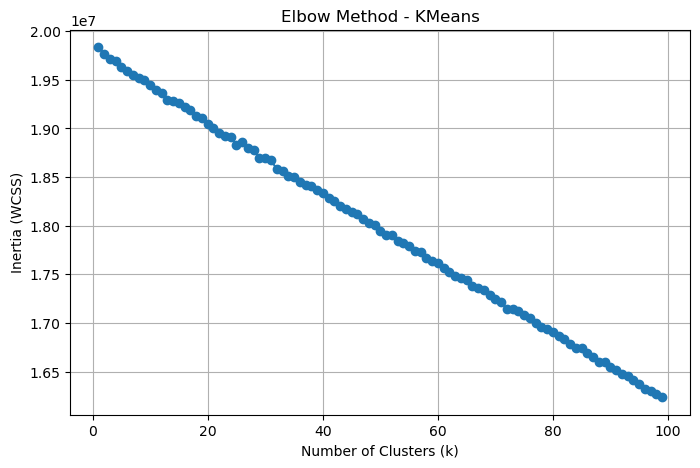

In [66]:
#finding right k value using elbow method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_pca is your PCA-transformed data
inertias = []
cluster_range = range(1, 100)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.title("Elbow Method - KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()



#there is no abrupt change which kindpof shows this data is not suited for Kmeans


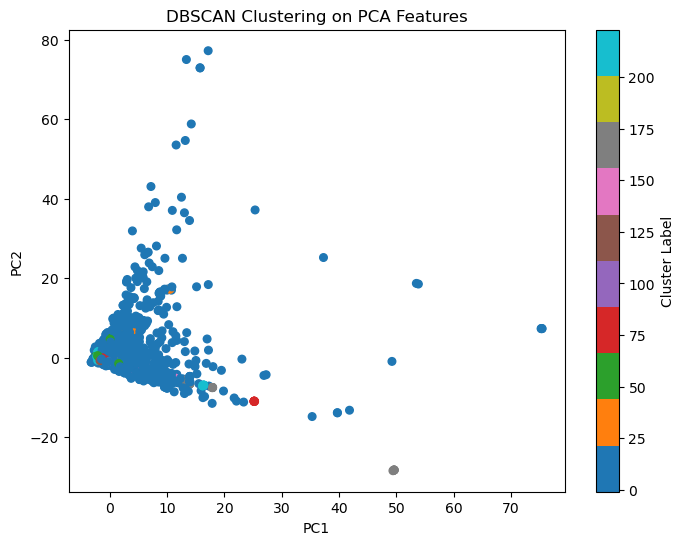

In [68]:
#Using DBSCAN algo there is no grouping it just find cluster based on price and cuisine they sell so it gives competitors in whole data set 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exclude non-feature columns
exclude_cols = ['ID', 'Area', 'City', 'Restaurant', 'Address', 'Delivery time', 'Food type','Cuisine_list']
base_features = [col for col in df.columns if col not in exclude_cols]

# Step 1: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[base_features])

# Step 2: Dimensionality reduction using PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5, metric='euclidean')  # You can tune eps and min_samples
labels = dbscan.fit_predict(X_pca)

# Step 4: Assign cluster labels
df['dbscan_cluster'] = labels

# Step 5: Visualize the clusters (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title("DBSCAN Clustering on PCA Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster Label")
plt.show()


In [70]:
# Get competitors of a given restaurant
def get_competitors(restaurant_name):
    cluster_id = df.loc[df['Restaurant'] == restaurant_name, 'dbscan_cluster'].values[0]
    if cluster_id == -1:
        return "This restaurant is considered noise (no cluster)."
    competitors = df[(df['dbscan_cluster'] == cluster_id) & (df['Restaurant'] != restaurant_name)]
    return competitors[['Restaurant', 'Area', 'City']]

# Example usage:
get_competitors("Theobroma")


,Restaurant,Area,City
777,Happy Belly Bakes- Cakes And Desserts,Ashok Nagar,Bangalore
817,Sweet Truth - Cake And Desserts,Shaniwar Peth,Pune
1290,Best Belgian Waffle,Erandwane,Pune
2423,Kekiz - The Cake Shop,Purasaiwakkam,Chennai
2625,Lsd - Love Sugar & Dough,Ghatkopar East,Mumbai
4320,Chocolate Biclate,Shivaji Nagar,Pune
4975,The Sugar Free Keto Kafe - By Artinci,Annanagar,Chennai
6982,La Heaven,Malleshwaram,Bangalore
8070,Cake L'Amore,Himayatnagar,Hyderabad
